In [ ]:
# Description : This program analysis the sentiment about crypto using news headlines and python

# Import the libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#!pip install pygooglenews  


In [ ]:
from GoogleNews import GoogleNews
#from newspaper import Article
import pandas as pd

In [ ]:
!pip install GoogleNews
!pip install newspaper3k

     |████████████████████████████████| 211 kB 27.8 MB/s 
  Using cached cssselect-1.1.0-py2.py3-none-any.whl (16 kB)
     |████████████████████████████████| 87 kB 5.9 MB/s 
     |████████████████████████████████| 7.4 MB 27.0 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=996fa371eb3e6f896b3a8508bb4ea611181a816e9e7739cd3120225eafedd981
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=09398d182bfadde70d886bafb9f5084ab93d275f696412d37a42929e43b6e82c
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=27fa5c60a433d19d2910d55bcd9c2f5749289e778ba65dd888722e4c1cb2a589
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a5979

In [ ]:
!pip install newspaper

  Using cached newspaper-0.1.0.7.tar.gz (176 kB)
  Using cached newspaper-0.1.0.6.tar.gz (176 kB)
  Using cached beautifulsoup4-4.3.2.tar.gz (143 kB)
  Using cached Pillow-2.5.1.zip (6.9 MB)
  Using cached PyYAML-3.11.zip (371 kB)
  Using cached cssselect-0.9.1.tar.gz (32 kB)
  Using cached lxml-3.3.5.tar.gz (3.5 MB)
  Using cached nltk-2.0.5.zip (1.1 MB)
  Using cached nltk-2.0.5.tar.gz (954 kB)
  Using cached newspaper-0.1.0.5.tar.gz (49 kB)
  Using cached newspaper-0.1.0.4.tar.gz (49 kB)
  Using cached newspaper-0.1.0.3.tar.gz (49 kB)
  Using cached newspaper-0.1.0.2.tar.gz (180 kB)
  Using cached newspaper-0.1.0.1.tar.gz (49 kB)
  Using cached newspaper-0.1.0.0.tar.gz (49 kB)
  Using cached newspaper-0.0.9.9.tar.gz (49 kB)
  Using cached newspaper-0.0.9.8.tar.gz (248 kB)
  Using cached newspaper-0.0.9.6.tar.gz (244 kB)
  Using cached nltk-2.0.4.zip (1.1 MB)
  Using cached nltk-2.0.4.tar.gz (955 kB)
  Using cached newspaper-0.0.9.5.tar.gz (244 kB)
  Using cached newspaper-0.0.9.2.ta

In [ ]:
!pip install GoogleNews

In [ ]:
googlenews=GoogleNews(start='05/01/2020',end='05/31/2020')
googlenews.search('Football')
result=googlenews.result()
df=pd.DataFrame(result)
print(df.head())

                                               title  ...                                                img
0  Legendary footballer Gary Lineker on his sport...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
1  Shula, winningest coach in pro football histor...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
2  2020 NFL schedule: How to watch, stream every ...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
3  Five substitutes option temporarily allowed fo...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
4  Pac-12 Football: Ranking the teams by 5-year a...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...

[5 rows x 7 columns]


In [ ]:
# Store the data
#df=df.read_csv('Cryptocurrency_News.csv')


In [ ]:
#Create a function to get the polarity 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity 

# Create one new column called 'Polarity'

df['Polarity']=df['title'].apply(getPolarity)

#df['Polarity']=df.apply(getPolarity)
#Showt he data set with the new column
df.head(5)

,title,media,date,datetime,desc,link,img,Polarity
0,Legendary footballer Gary Lineker on his sport...,CNN,"May 16, 2020",2020-05-16,Legendary footballer Gary Lineker on his sport...,https://www.cnn.com/2020/05/15/football/gary-l...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.516667
1,"Shula, winningest coach in pro football histor...",AP News,"May 4, 2020",2020-05-04,"Shula, winningest coach in pro football histor...",https://apnews.com/article/bum-phillips-super-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000000
2,"2020 NFL schedule: How to watch, stream every ...",CBS Sports,"May 8, 2020",2020-05-08,"""Monday Night Football"" will once again be tel...",https://www.cbssports.com/nfl/news/2020-nfl-sc...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",-0.183333
3,Five substitutes option temporarily allowed fo...,,"May 8, 2020",2020-05-08,As football begins to consider resumption of c...,https://www.fifa.com/media-releases/five-subst...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000000
4,Pac-12 Football: Ranking the teams by 5-year a...,Pacific Takes,"May 27, 2020",2020-05-27,Thanks to the fine people at College Football ...,https://www.pacifictakes.com/2020/5/27/2127220...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000000


In [ ]:
# Create a function to compute negative, neutral and positive sentiments
def getSentiment(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


# Create a new column to store the sentiment
df['Sentiment']= df['Polarity'].apply(getSentiment)


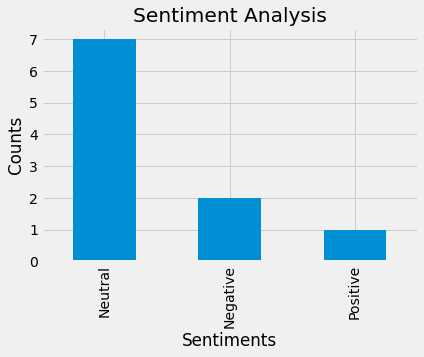

In [ ]:
#Plot and visualize the sntiment count
plt.title('Sentiment Analysis')
df['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

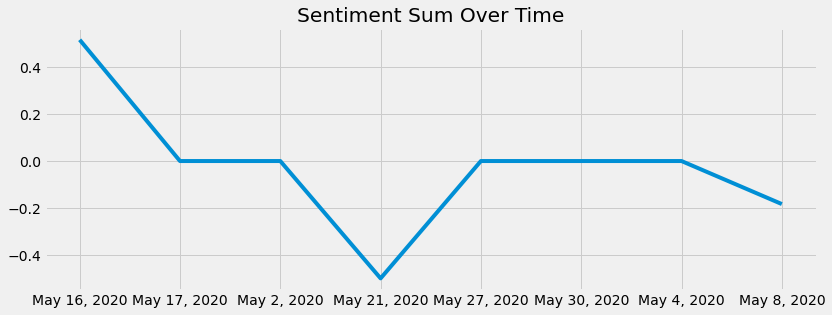

In [ ]:
# Plot ths sum of the polarity of each date
plt.figure(figsize=(12.33, 4.5))
plt.title('Sentiment Sum Over Time')
Polarity=df.groupby(['date']).sum()['Polarity']
plt.plot(Polarity.index, Polarity)

In [ ]:
# Show the sum of the polarity for each date
Polarity

date
May 16, 2020    0.516667
May 17, 2020    0.000000
May 2, 2020     0.000000
May 21, 2020   -0.500000
May 27, 2020    0.000000
May 30, 2020    0.000000
May 4, 2020     0.000000
May 8, 2020    -0.183333
Name: Polarity, dtype: float64

In [ ]:
# Get the count of each ariticle per date
polarity_count=df.groupby(['date']).count()['Polarity']
#Show the data
polarity_count

date
May 16, 2020    1
May 17, 2020    1
May 2, 2020     1
May 21, 2020    1
May 27, 2020    1
May 30, 2020    2
May 4, 2020     1
May 8, 2020     2
Name: Polarity, dtype: int64

In [ ]:
# Show the average sentiment for each day 

polarity_avg=Polarity/ polarity_count
polarity_avg

date
May 16, 2020    0.516667
May 17, 2020    0.000000
May 2, 2020     0.000000
May 21, 2020   -0.500000
May 27, 2020    0.000000
May 30, 2020    0.000000
May 4, 2020     0.000000
May 8, 2020    -0.091667
Name: Polarity, dtype: float64

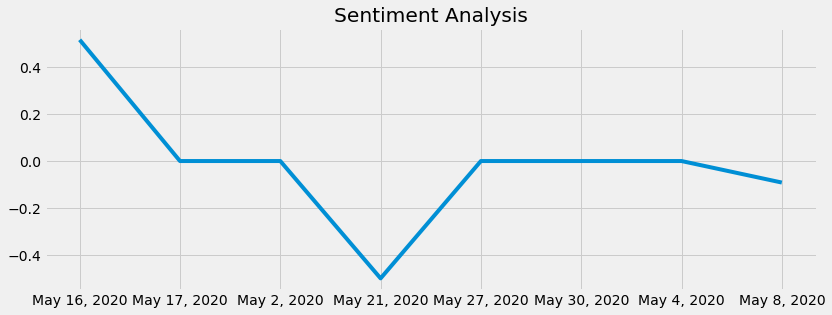

In [ ]:
#Plot the average sentiment over time
plt.figure(figsize=(12.33,4.5))
plt.title('Sentiment Analysis')
plt.plot(polarity_avg.index, polarity_avg)

Additional code to get Data

In [ ]:
!pip install newspaper

  Using cached newspaper-0.1.0.7.tar.gz (176 kB)
  Using cached newspaper-0.1.0.6.tar.gz (176 kB)
  Using cached beautifulsoup4-4.3.2.tar.gz (143 kB)
  Using cached Pillow-2.5.1.zip (6.9 MB)
  Using cached PyYAML-3.11.zip (371 kB)
  Using cached cssselect-0.9.1.tar.gz (32 kB)
  Using cached lxml-3.3.5.tar.gz (3.5 MB)
  Using cached nltk-2.0.5.zip (1.1 MB)
  Using cached nltk-2.0.5.tar.gz (954 kB)
  Using cached newspaper-0.1.0.5.tar.gz (49 kB)
  Using cached newspaper-0.1.0.4.tar.gz (49 kB)
  Using cached newspaper-0.1.0.3.tar.gz (49 kB)
  Using cached newspaper-0.1.0.2.tar.gz (180 kB)
  Using cached newspaper-0.1.0.1.tar.gz (49 kB)
  Using cached newspaper-0.1.0.0.tar.gz (49 kB)
  Using cached newspaper-0.0.9.9.tar.gz (49 kB)
  Using cached newspaper-0.0.9.8.tar.gz (248 kB)
  Using cached newspaper-0.0.9.6.tar.gz (244 kB)
  Using cached nltk-2.0.4.zip (1.1 MB)
  Using cached nltk-2.0.4.tar.gz (955 kB)
  Using cached newspaper-0.0.9.5.tar.gz (244 kB)
  Using cached newspaper-0.0.9.2.ta

In [ ]:
!pip install newspaper3k

In [ ]:
from newspaper import Article

In [ ]:

from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
import pandas as pd
import nltk

In [ ]:
for ind in df.index:
    dict={}
    article = Article(df['link'][ind])
    article.download()
    article.parse()
    article.nlp()
    dict['Date']=df['date'][ind]
    dict['Media']=df['media'][ind]
    dict['Title']=article.title
    dict['Article']=article.text
    dict['Summary']=article.summary
    list.append(dict)
news_df=pd.DataFrame(list)
#news_df.to_excel("articles.xlsx")

TypeError: ignored

In [ ]:
for i in range(2,20):
    googlenews.getpage(i)
    result=googlenews.result()
    df=pd.DataFrame(result)
list=[]

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
import pandas as pd
import nltk
#config will allow us to access the specified url for which we are #not authorized. Sometimes we may get 403 client error while parsing #the link to download the article.
nltk.download('punkt')

user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
config = Config()
config.browser_user_agent = user_agent
googlenews=GoogleNews(start='05/01/2020',end='05/31/2020')
googlenews.search('Coronavirus')
result=googlenews.result()
df=pd.DataFrame(result)
print(df.head())
for i in range(2,20):
    googlenews.getpage(i)
    result=googlenews.result()
    df=pd.DataFrame(result)
list=[]
for ind in df.index:
    dict={}
    article = Article(df['link'][ind],config=config)
    article.download()
    article.parse()
    article.nlp()
    dict['Date']=df['date'][ind]
    dict['Media']=df['media'][ind]
    dict['Title']=article.title
    dict['Article']=article.text
    dict['Summary']=article.summary
    list.append(dict)
news_df=pd.DataFrame(list)
news_df.to_excel("articles.xlsx")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
                                               title  ...                                                img
0    White House to wind down coronavirus task force  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
1  Coronavirus Vaccine Research Gets $8 Billion i...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
2  Reviewing Coronavirus Food Assistance Program ...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
3  Navajo nation reels under weight of coronaviru...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
4  Coronavirus model projects 134,000 deaths in U...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...

[5 rows x 7 columns]


ArticleException: ignored